In [1]:
pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 99.8/99.8 MB 2.4 MB/s eta 0:00:00


In [2]:
# Common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Importing Algorithims 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Libraries for Hyper-parameter tining
from sklearn.model_selection import ShuffleSplit , cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Libraries for Comparision
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.metrics import mean_absolute_error

# For font and style
%matplotlib inline 
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format','{:.6f}'.format)

# For warnings
import warnings 
warnings.filterwarnings('ignore')

Importing the Data

In [3]:
df = pd.read_csv("C://Users//KAMDEO SINGH//Downloads//chicago-energy-benchmarking-1.csv")
df.head()

,Data Year,ID,Property Name,Address,ZIP Code,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),All Other Fuel Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location
0,2014,157767,Roosevelt Hi-CPS,3436 W WILSON AVE,60625,ALBANY PARK,K-12 School,319900.000000,1927.000000,1,71.000000,6889272.000000,18731796.000000,NaN,NaN,NaN,80.000000,129.000000,75.000000,122.000000,2379.000000,7.440000,41.965013,-87.714513,"(41.96501325, -87.71451268)"
1,2014,100256,Curie Metrop-CPS,4975 S Archer,60632,ARCHER HEIGHTS,K-12 School,447330.000000,1990.000000,1,19.000000,35792767.000000,7180231.000000,NaN,NaN,NaN,96.000000,268.000000,93.000000,261.000000,7573.000000,16.930000,41.802759,-87.722671,"(41.802759, -87.722671)"
2,2014,101551,METROPOLITIAN PIER AND EXPOSITION AUTHORITY,301 Cermak Road,60616,ARMOUR SQUARE,Convention Center,9245333.000000,1971.000000,8,NaN,485542954.000000,344178866.000000,NaN,NaN,NaN,90.000000,204.000000,86.000000,200.000000,115833.000000,12.530000,41.852840,-87.634931,"(41.85284, -87.634931)"
3,2014,100396,St. Rita of Cascia High School,7740 South Western Avenue,60620,ASHBURN,K-12 School,250000.000000,1960.000000,1,68.000000,6027551.000000,15042857.000000,NaN,NaN,NaN,84.000000,139.000000,80.000000,135.000000,2010.000000,8.040000,41.752003,-87.684637,"(41.7520028, -87.68463714)"
4,2014,250052,Steinmetz Ac-CPS,3030 N MOBILE AVE,60634,BELMONT CRAGIN,K-12 School,323400.000000,1934.000000,1,66.000000,8184634.000000,19187703.000000,NaN,NaN,NaN,85.000000,142.000000,80.000000,136.000000,2664.000000,8.240000,41.935603,-87.784340,"(41.93560335, -87.7843396)"


# DATA PREPROCESSING

In [4]:
df.columns

Index(['Data Year', 'ID', 'Property Name', 'Address', 'ZIP Code',
       'Community Area', 'Primary Property Type',
       'Gross Floor Area - Buildings (sq ft)', 'Year Built', '# of Buildings',
       'ENERGY STAR Score', 'Electricity Use (kBtu)', 'Natural Gas Use (kBtu)',
       'District Steam Use (kBtu)', 'District Chilled Water Use (kBtu)',
       'All Other Fuel Use (kBtu)', 'Site EUI (kBtu/sq ft)',
       'Source EUI (kBtu/sq ft)', 'Weather Normalized Site EUI (kBtu/sq ft)',
       'Weather Normalized Source EUI (kBtu/sq ft)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'GHG Intensity (kg CO2e/sq ft)', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [5]:
df = df[['Electricity Use (kBtu)','Gross Floor Area - Buildings (sq ft)',
         'Weather Normalized Source EUI (kBtu/sq ft)','# of Buildings']]
df.head()

,Electricity Use (kBtu),Gross Floor Area - Buildings (sq ft),Weather Normalized Source EUI (kBtu/sq ft),# of Buildings
0,6889272.000000,319900.000000,122.000000,1
1,35792767.000000,447330.000000,261.000000,1
2,485542954.000000,9245333.000000,200.000000,8
3,6027551.000000,250000.000000,135.000000,1
4,8184634.000000,323400.000000,136.000000,1


In [6]:
df.columns = ['Electricity_used','Sq_ft','Weather','Buildings']
df.head()

,Electricity_used,Sq_ft,Weather,Buildings
0,6889272.000000,319900.000000,122.000000,1
1,35792767.000000,447330.000000,261.000000,1
2,485542954.000000,9245333.000000,200.000000,8
3,6027551.000000,250000.000000,135.000000,1
4,8184634.000000,323400.000000,136.000000,1


In [7]:
df = df[['Sq_ft','Weather','Buildings','Electricity_used']]
df.head()

,Sq_ft,Weather,Buildings,Electricity_used
0,319900.000000,122.000000,1,6889272.000000
1,447330.000000,261.000000,1,35792767.000000
2,9245333.000000,200.000000,8,485542954.000000
3,250000.000000,135.000000,1,6027551.000000
4,323400.000000,136.000000,1,8184634.000000


In [8]:
df.shape

(4481, 4)

In [9]:
df.isna().sum()

Sq_ft                0
Weather             89
Buildings            0
Electricity_used    26
dtype: int64

In [10]:
df.dropna(subset=['Electricity_used'],inplace=True)

In [11]:
mean_weather = df['Weather'].mean()

In [12]:
round(mean_weather,2)

202.83

In [13]:
df['Weather'] = df['Weather'].fillna(mean_weather)

In [14]:
df.isna().sum()

Sq_ft               0
Weather             0
Buildings           0
Electricity_used    0
dtype: int64

In [15]:
df.shape

(4455, 4)

In [16]:
df.describe()

,Sq_ft,Weather,Buildings,Electricity_used
count,4455.000000,4455.000000,4455.000000,4455.000000
mean,312960.024198,202.831798,1.501010,15129389.743524
std,497043.905367,269.373993,5.853390,32241810.025687
min,44575.000000,9.000000,1.000000,214.000000
25%,80028.000000,125.400000,1.000000,2362654.800000
50%,146501.000000,163.200000,1.000000,5494589.300000
75%,345406.000000,215.400000,1.000000,13108450.000000
max,9245333.000000,8550.400000,236.000000,495368832.000000


In [17]:
df[df['Sq_ft'] == 9245333.000000]

,Sq_ft,Weather,Buildings,Electricity_used
2,9245333.000000,200.000000,8,485542954.000000
1764,9245333.000000,195.600000,8,469870273.000000
1824,9245333.000000,205.800000,8,485705024.000000


In [18]:
df.head()

,Sq_ft,Weather,Buildings,Electricity_used
0,319900.000000,122.000000,1,6889272.000000
1,447330.000000,261.000000,1,35792767.000000
2,9245333.000000,200.000000,8,485542954.000000
3,250000.000000,135.000000,1,6027551.000000
4,323400.000000,136.000000,1,8184634.000000


In [19]:
df.corr()

,Sq_ft,Weather,Buildings,Electricity_used
Sq_ft,1.000000,0.010543,0.156774,0.891359
Weather,0.010543,1.000000,0.001882,0.108579
Buildings,0.156774,0.001882,1.000000,0.103789
Electricity_used,0.891359,0.108579,0.103789,1.000000


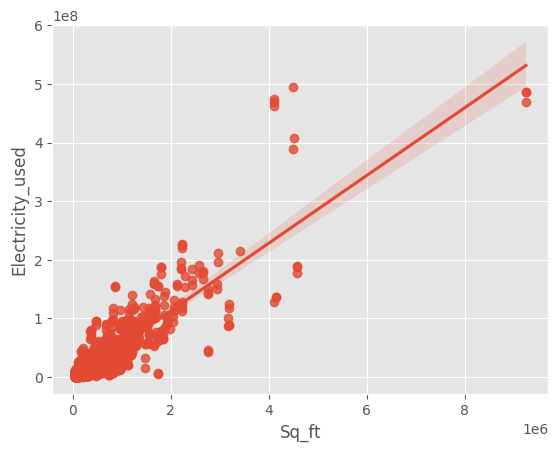

In [20]:
sns.regplot(x = 'Sq_ft', y = 'Electricity_used', data = df)
plt.show()


In [21]:


df_full = pd.read_csv("C://Users//KAMDEO SINGH//Downloads//chicago-energy-benchmarking-1.csv")
line_df = df_full.groupby('Data Year')['Electricity Use (kBtu)'].sum()
line_df

Data Year
2014   13467468768.000000
2015   24842394212.000000
2016   29091568327.400002
Name: Electricity Use (kBtu), dtype: float64

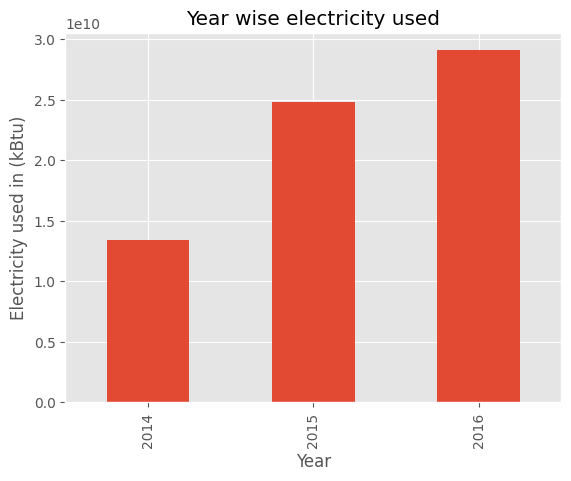

In [22]:
line_df.plot(kind = 'bar')
plt.title('Year wise electricity used')
plt.xlabel('Year')
plt.ylabel('Electricity used in (kBtu)')
plt.show()

# Scaling the data

In [24]:
scaler = StandardScaler()
scaler.fit(df[['Sq_ft','Weather','Buildings']])

StandardScaler()

In [25]:
scaled = scaler.transform(df[['Sq_ft','Weather','Buildings']])
scaled

array([[ 1.39640679e-02, -3.00106447e-01, -8.56027545e-02],
       [ 2.70368589e-01,  2.15962686e-01, -8.56027545e-02],
       [ 1.79730112e+01, -1.05136964e-02,  1.11041960e+00],
       ...,
       [-4.79820374e-01,  1.37916023e+00, -8.56027545e-02],
       [-2.82807615e-01,  3.60902441e+00, -8.56027545e-02],
       [-3.48016418e-01, -5.20962452e-02, -8.56027545e-02]])

In [26]:
scaled[:,0]

array([ 1.39640679e-02,  2.70368589e-01,  1.79730112e+01, ...,
       -4.79820374e-01, -2.82807615e-01, -3.48016418e-01])

In [27]:
df['Sq_ft'] = scaled[:,0]
df['Weather'] = scaled[:,1]
df['Buildings'] = scaled[:,2]

In [28]:
df.head()

,Sq_ft,Weather,Buildings,Electricity_used
0,0.013964,-0.300106,-0.085603,6889272.000000
1,0.270369,0.215963,-0.085603,35792767.000000
2,17.973011,-0.010514,1.110420,485542954.000000
3,-0.126683,-0.251841,-0.085603,6027551.000000
4,0.021006,-0.248128,-0.085603,8184634.000000


In [29]:
df.isna().sum()

Sq_ft               0
Weather             0
Buildings           0
Electricity_used    0
dtype: int64

# Splitting the data

In [30]:
X = df.drop(['Electricity_used'], axis = 1)
y = df['Electricity_used']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

3564
891
3564
891


In [33]:
X_train.head()

,Sq_ft,Weather,Buildings
95,3.076082,-0.192437,-0.085603
3056,-0.514517,1.141546,-0.085603
2792,4.903618,-0.261494,0.426978
4480,-0.348016,-0.052096,-0.085603
240,0.379548,-0.285256,1.281280


# Model Building

In [82]:
models = []
models.append(('Linear', LinearRegression()))
models.append(('Ridge',Ridge(random_state=1)))
models.append(('Lasso',Lasso(random_state=1)))
models.append(('Elastic net',ElasticNet(random_state=1)))
models.append(('Decision Tree', DecisionTreeRegressor(random_state=1)))
models.append(('Random Forest', RandomForestRegressor(random_state=1)))

result = []
names = []

for name, model in models:
    model.fit(X_train,y_train)
    score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    result.append(score)
    print('{}: Train {}, Test {}'.format(name,score,test_score))

Linear: Train 0.8089937689460402, Test 0.7832256097114555
Ridge: Train 0.808993707671905, Test 0.7831761340322119
Lasso: Train 0.8089937689460363, Test 0.7832256152899489
Elastic net: Train 0.7239350280463618, Test 0.6557043218547682
Decision Tree: Train 0.9999954625078863, Test 0.9600265178629425
Random Forest: Train 0.9949832873529324, Test 0.9414542161490833


In [83]:
print('RMSE Scores for the models\n')
for name, model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,pred))
    print('{}: {}'.format(name, rmse))

RMSE Scores for the models

Linear: 15289843.443319043
Ridge: 15291588.188697198
Lasso: 15289843.246583875
Elastic net: 19269251.160027258
Decision Tree: 6565760.589585783
Random Forest: 7945968.963550113


In [34]:
xgb = XGBRegressor(n_estimators = 10000,early_stopping_rounds = 300, learning_rate = 0.1)
xgb.fit(X_train,y_train, eval_set=[(X_train,y_train),(X_test,y_test)], verbose=50)
xgb.score(X_train,y_train)

[0]	validation_0-rmse:29277177.19814	validation_1-rmse:29965843.52330
[50]	validation_0-rmse:3054163.60987	validation_1-rmse:6871986.02630
[100]	validation_0-rmse:2614356.81461	validation_1-rmse:6677815.52271
[150]	validation_0-rmse:2267222.53655	validation_1-rmse:6710572.72997
[200]	validation_0-rmse:2052793.26707	validation_1-rmse:6665471.32310
[250]	validation_0-rmse:1871243.99042	validation_1-rmse:6685441.12082
[300]	validation_0-rmse:1710085.12518	validation_1-rmse:6680866.79074
[350]	validation_0-rmse:1591093.75165	validation_1-rmse:6660069.09626
[400]	validation_0-rmse:1457935.59926	validation_1-rmse:6672673.30480
[450]	validation_0-rmse:1368579.26123	validation_1-rmse:6702412.31132
[500]	validation_0-rmse:1287085.01904	validation_1-rmse:6712216.90093
[550]	validation_0-rmse:1225413.65889	validation_1-rmse:6721457.19169
[600]	validation_0-rmse:1154491.31767	validation_1-rmse:6730183.61345
[622]	validation_0-rmse:1119608.33734	validation_1-rmse:6734492.62243


0.9973487722571881

In [35]:
xgb.score(X_test,y_test)

0.9589273167541061

In [36]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb.predict(X_test)))
print('XGBoost: RMSE: {}'.format(rmse_xgb))

XGBoost: RMSE: 6655421.875389398


In [39]:
sns.__version__

'0.11.2'

# Hyperparameter tuning

In [88]:
params_dt = {'max_depth':[None,10,20,30],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,4,5,6,10],
    'max_features':['auto', 'sqrt', 'log2'],
    'min_weight_fraction_leaf':[0.0,0.1,0.001],
    'max_features':[1,2,3,4]}

In [89]:
grid_serch = GridSearchCV(estimator=dt, param_grid=params_dt, cv= 5, scoring='accuracy')

In [90]:
grid_serch.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 4, 5, 6, 10],
                         'min_samples_split': [2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.001]},
             scoring='accuracy')

In [91]:
best_score = grid_serch.best_score_
best_estimate = grid_serch.best_params_

In [92]:
best_estimate

{'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0}

In [45]:
dt_new = DecisionTreeRegressor(max_depth=None, 
                               max_features='auto', 
                               min_samples_leaf=1, 
                               min_samples_split=2)
dt_new.fit(X_train,y_train)

DecisionTreeRegressor(max_features='auto')

In [46]:
print('Decision Tree Tuned train score: ',dt_new.score(X_train,y_train))
print('Decision Tree Tuned test score: ',dt_new.score(X_test,y_test))

Decision Tree Tuned train score:  0.9999954625078863
Decision Tree Tuned test score:  0.9582432186412967


In [47]:
pred_dt = dt_new.predict(X_test)

In [52]:
plot_dt = pd.DataFrame([y_test,pred_dt]).transpose()
plot_dt.columns = ['Actual set','Predicted set']

<Axes: ylabel='Density'>

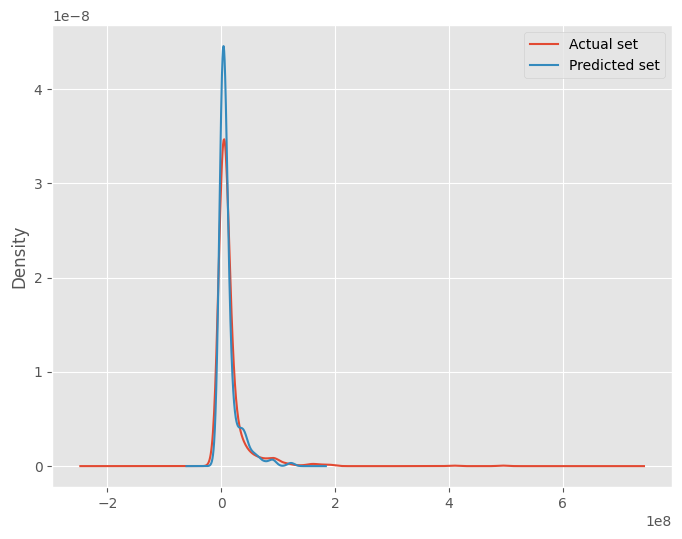

In [58]:
plot_dt.plot(kind = 'kde', figsize = (8,6))

# XGBoost Regressor

In [98]:
param_xgb = {
    'n_estimators': [1000, 10000, 15000],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4], 
    'min_child_weight': [1, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.01, 0.1], 
    'reg_lambda': [0, 0.01, 0.1],
}

In [99]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
grid_serch_xgb = RandomizedSearchCV(estimator=XGBRegressor(), 
                                    param_distributions=param_xgb, 
                                    scoring=mse_scorer, 
                                    cv=5, 
                                    verbose=50, 
                                    error_score='raise')

In [100]:
grid_serch_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=15000, reg_alpha=0.1, reg_lambda=0.01, subsample=0.9
[CV 1/5; 1/10] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=15000, reg_alpha=0.1, reg_lambda=0.01, subsample=0.9;, score=-50955061190329.523 total time=   7.0s
[CV 2/5; 1/10] START colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=15000, reg_alpha=0.1, reg_lambda=0.01, subsample=0.9
[CV 2/5; 1/10] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=15000, reg_alpha=0.1, reg_lambda=0.01, subsample=0.9;, score=-35471264316164.391 total time=   6.9s
[CV 3/5; 1/10] START colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=15000, reg_alpha=0.1, reg_lambda=0.01, subsample=0.9

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints...
                                          random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma'

In [101]:
grid_serch_xgb.best_params_

{'subsample': 0.9,
 'reg_lambda': 0,
 'reg_alpha': 0.01,
 'n_estimators': 1000,
 'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.01,
 'gamma': 0.1,
 'colsample_bytree': 1.0}

In [59]:
xgb2 = XGBRegressor(subsample = 0.8,
                    reg_lambda = 0.1,
                    reg_alpha = 0.01,
                    n_estimators = 10000,
                    min_child_weight = 3,
                    max_depth = 4,
                    learning_rate = 0.01,
                    gamma = 1,
                    colsample_bytree = 1)
xgb2.fit(X_train,y_train)
print('XGBoost Tuned test score: ',xgb2.score(X_train, y_train))
print('XGBoost Tuned test score: ',xgb2.score(X_test,y_test))

XGBoost Tuned test score:  0.9972199903142375
XGBoost Tuned test score:  0.9603053694640229


In [72]:
pred_xgb = xgb2.predict(X_test)
len(pred_xgb)

891

In [77]:
len(y_test)

891

In [88]:
plot_xgb = pd.DataFrame(data= pred_xgb)
plot_xgb.columns = ['Predicted']
plot_xgb1 = pd.DataFrame(data = y_test)
plot_xgb1.columns = ['Actual']

<Axes: ylabel='Density'>

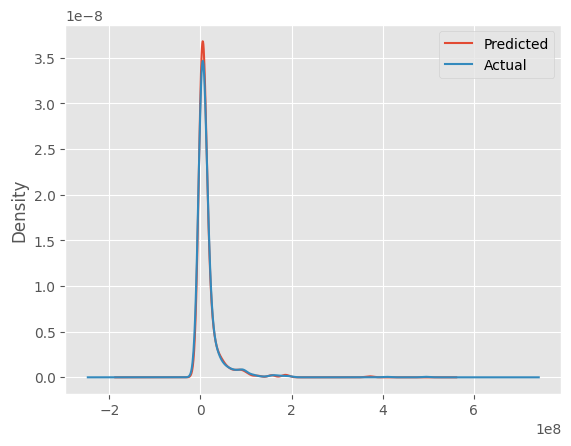

In [89]:
ax = plot_xgb.plot(kind='kde')
plot_xgb1.plot(kind = 'kde',ax = ax)
plt.title('XGBoost actual vs predicted')
plt.xlabel()

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

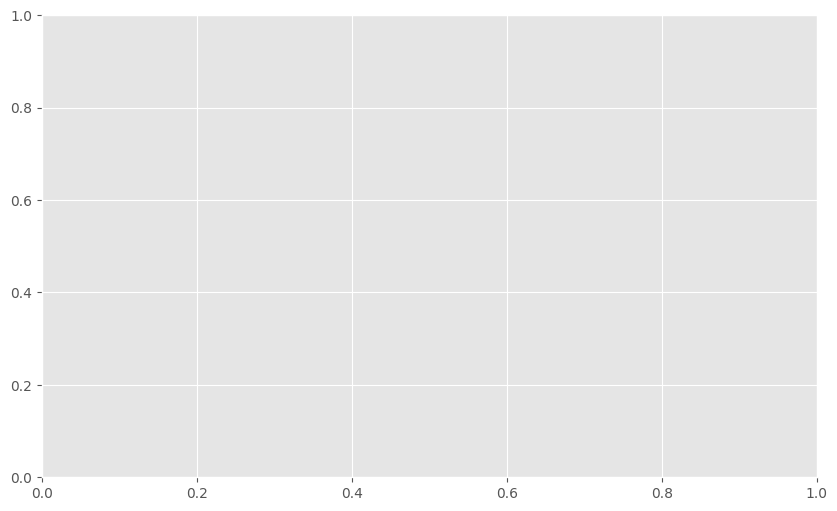

In [142]:


plt.figure(figsize=(10,6))
#ax = sns.distplot(y_test, hist=False, label='Acutal Set')
sns.kdeplot(xgb2.predict(X_test), hist=False, label='Predicted Set')
plt.title('Actual vs predicted using XGBoost')
plt.legend()
plt.show()

In [104]:
xgb2.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=3, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10000,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

# Predicting for new Data

In [128]:
def predict_price(sqft,weather,buildings):
    
    x = np.zeros(len(X.columns))
    x[0] = (sqft - df['Sq_ft'].mean()) / df['Sq_ft'].std()
    x[1] = (weather - df['Weather'].mean()) / df['Weather'].std()
    x[2] = (buildings - df['Buildings'].mean()) / df['Buildings'].std()
    df_input = pd.DataFrame(data=x.reshape(1,-1),columns=X.columns)
    
    
    return xgb2.predict(df_input)[0]

In [129]:
df.head()

,Sq_ft,Weather,Buildings,Electricity_used
0,0.013964,-0.300106,-0.085603,319864.094506
1,0.270369,0.215963,-0.085603,121.986307
2,17.973011,-0.010514,1.110420,0.999888
3,-0.126683,-0.251841,-0.085603,6027551.000000
4,0.021006,-0.248128,-0.085603,8184634.000000


In [130]:
predict_price(319900,122,1)

533817300.0

In [ ]:
predict_price()